In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# ● This project will test your data science abilities as well as Machine learning modeling abilities ● you will find the dataset which is related to DDoS Attacks by following this link (https://www.kaggle.com/siddharthm1698/ddos-botnet-attack-on-iot-devices?select=DDoSdata.csv) Download this data 
● The data is highly undistributed 
● Convert every attribute data type into float data type so attributes require one hot encoding (label encoder) 


In [2]:
data = pd.read_csv("E:\AIML- Artifical intelligence course\Machine learning & Data Science\Assignment ML & DS\Assignment 5/DDoSdata.csv")
data[:5]

C:\Users\Acer\AppData\Local\Temp\ipykernel_8412\3677814819.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("E:\AIML- Artifical intelligence course\Machine learning & Data Science\Assignment ML & DS\Assignment 5/DDoSdata.csv")


,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [3]:
data.shape

(1927101, 47)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 47 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   pkSeqID                           int64  
 2   stime                             float64
 3   flgs                              object 
 4   flgs_number                       int64  
 5   proto                             object 
 6   proto_number                      int64  
 7   saddr                             object 
 8   sport                             object 
 9   daddr                             object 
 10  dport                             object 
 11  pkts                              int64  
 12  bytes                             int64  
 13  state                             object 
 14  state_number                      int64  
 15  ltime                             float64
 16  seq                               in

Before applying Feature selection techniques, we see that there are some columns which are not useful like Unnamed:0,pkSeqId(both these columns give us the sequence ID), 
flags(numerical representation of flags is mentioned in flags_number), 
proto(numerical representation of proto is mentioned in proto_number),
saddr,sport,daddr,dport(all these are mentioned as object datatype column which has continuous numerical presentation), State(numerical representation of state is mentioned in state_numbers). Hence we are dropping these columns. 

In [5]:
# Dropping columns which are not necessary.
df = data.drop(["Unnamed: 0","pkSeqID","flgs","proto","saddr","sport","daddr","dport","state"],axis = 1)
df[:5]

,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,mean,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.528103e+09,1,1,10,1729,1,1.528103e+09,20,6.406424,0.679473,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1.528103e+09,1,1,10,1604,1,1.528103e+09,21,6.405851,0.679572,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1.528103e+09,1,1,8,1708,1,1.528103e+09,22,6.401038,1.110847,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1.528103e+09,1,1,8,1462,1,1.528103e+09,23,6.400703,1.113328,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1.528103e+09,1,1,8,1296,1,1.528103e+09,24,6.400472,1.113098,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [6]:
df.isnull().sum() # no null values present in the dataset

stime                               0
flgs_number                         0
proto_number                        0
pkts                                0
bytes                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate                                0
srate                               0
drate                               0
TnBPSrcIP                           0
TnBPDstIP                           0
TnP_PSrcIP                          0
TnP_PDstIP                          0
TnP_PerProto                        0
TnP_Per_Dpor

In [7]:
set(df.category) # values present in category column

{'DDoS', 'Normal'}

In [8]:
set(data.subcategory) # values present in subcategory column

{'HTTP', 'Normal', 'TCP', 'UDP'}

Applying label encoder on object columns i.e Category and Sub- category columns


In [9]:
# updating category column
le_category = preprocessing.LabelEncoder()
le_category.fit(['DDoS','Normal'])
df['category']= le_category.fit_transform(df['category'])
df['category']

0          0
1          0
2          0
3          0
4          0
          ..
1927096    1
1927097    1
1927098    1
1927099    1
1927100    1
Name: category, Length: 1927101, dtype: int32

In [10]:
set(df.category) # int values updated after label encoding

{0, 1}

In [11]:
# updating sub-category column
le_subcategory = preprocessing.LabelEncoder()
le_subcategory.fit(['HTTP','Normal','TCP','UDP'])
df['subcategory'] = le_subcategory.fit_transform(df['subcategory'])
df['subcategory']

0          0
1          0
2          0
3          0
4          0
          ..
1927096    1
1927097    1
1927098    1
1927099    1
1927100    1
Name: subcategory, Length: 1927101, dtype: int32

In [12]:
set(df.subcategory) # int values updated after label encoding

{0, 1, 2, 3}

In [13]:
df[:2]

,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,mean,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.528103e+09,1,1,10,1729,1,1.528103e+09,20,6.406424,0.679473,...,1.21662,40,38,1.56093,1.21662,328,308,1,0,0
1,1.528103e+09,1,1,10,1604,1,1.528103e+09,21,6.405851,0.679572,...,1.21662,40,38,1.56107,1.21662,328,308,1,0,0


In [14]:
# Independent variable
X = df.drop('attack', axis = 1)
X[:2]

,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,mean,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,category,subcategory
0,1.528103e+09,1,1,10,1729,1,1.528103e+09,20,6.406424,0.679473,...,1.26889,1.21662,40,38,1.56093,1.21662,328,308,0,0
1,1.528103e+09,1,1,10,1604,1,1.528103e+09,21,6.405851,0.679572,...,1.26889,1.21662,40,38,1.56107,1.21662,328,308,0,0


In [15]:
# dependent variable
Y = df['attack']
Y[:2]

0    1
1    1
Name: attack, dtype: int64

In [16]:
# converting entire variables datatype to float datatypes
df = df.astype(float)
print(df.dtypes)

stime                               float64
flgs_number                         float64
proto_number                        float64
pkts                                float64
bytes                               float64
state_number                        float64
ltime                               float64
seq                                 float64
dur                                 float64
mean                                float64
stddev                              float64
sum                                 float64
min                                 float64
max                                 float64
spkts                               float64
dpkts                               float64
sbytes                              float64
dbytes                              float64
rate                                float64
srate                               float64
drate                               float64
TnBPSrcIP                           float64
TnBPDstIP                       

# You need to apply correlation and variance concepts so that you will take only important columns into consideration 

In [17]:
# applying correlation on independent variables 
corr = X.corr()
corr

,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,mean,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,category,subcategory
stime,1.000000,-0.037305,0.053141,-0.231689,-0.209283,0.053552,1.000000,0.023411,-0.265006,0.064384,...,-0.113722,-0.110760,0.548889,0.045475,-0.018777,-0.003013,-0.094223,-0.079510,-0.997868,0.110604
flgs_number,-0.037305,1.000000,-0.721827,-0.001919,0.008048,-0.591638,-0.037219,-0.100535,0.202020,-0.327331,...,-0.008265,-0.004748,-0.024668,-0.059868,-0.005599,-0.012326,-0.376309,-0.336664,-0.009707,-0.714967
proto_number,0.053141,-0.721827,1.000000,0.015475,-0.000435,0.790461,0.053096,-0.010303,-0.114764,0.638364,...,-0.004447,-0.002717,0.025592,0.087377,-0.000360,-0.009844,0.604996,0.543533,0.011856,0.994158
pkts,-0.231689,-0.001919,0.015475,1.000000,0.983805,0.007050,-0.231499,-0.013049,0.482558,0.021304,...,0.000686,0.000169,-0.132760,-0.009706,0.001356,0.000835,0.526960,0.475939,0.233085,0.004663
bytes,-0.209283,0.008048,-0.000435,0.983805,1.000000,-0.002407,-0.209114,-0.006026,0.432014,0.006120,...,0.000895,0.000316,-0.119635,-0.010394,0.001356,0.001168,0.489090,0.450907,0.209606,-0.009928
state_number,0.053552,-0.591638,0.790461,0.007050,-0.002407,1.000000,0.053499,0.070693,-0.131483,0.513749,...,-0.006268,-0.003243,0.048990,0.077885,-0.005796,-0.006116,0.399889,0.358130,-0.002317,0.788473
ltime,1.000000,-0.037219,0.053096,-0.231499,-0.209114,0.053499,1.000000,0.023325,-0.264589,0.064323,...,-0.113740,-0.110777,0.548874,0.045481,-0.018782,-0.003021,-0.094096,-0.079393,-0.997871,0.110561
seq,0.023411,-0.100535,-0.010303,-0.013049,-0.006026,0.070693,0.023325,1.000000,-0.197106,-0.060825,...,0.002078,0.000771,0.066487,0.024978,0.000913,0.012107,-0.219234,-0.192994,-0.024394,-0.005408
dur,-0.265006,0.202020,-0.114764,0.482558,0.432014,-0.131483,-0.264589,-0.197106,1.000000,-0.153028,...,-0.011104,-0.006820,-0.179853,0.000612,-0.005922,-0.016828,0.308358,0.279856,0.258289,-0.126386
mean,0.064384,-0.327331,0.638364,0.021304,0.006120,0.513749,0.064323,-0.060825,-0.153028,1.000000,...,-0.013994,-0.009254,0.038087,0.055683,-0.005158,-0.021680,0.523715,0.480016,-0.022963,0.638151


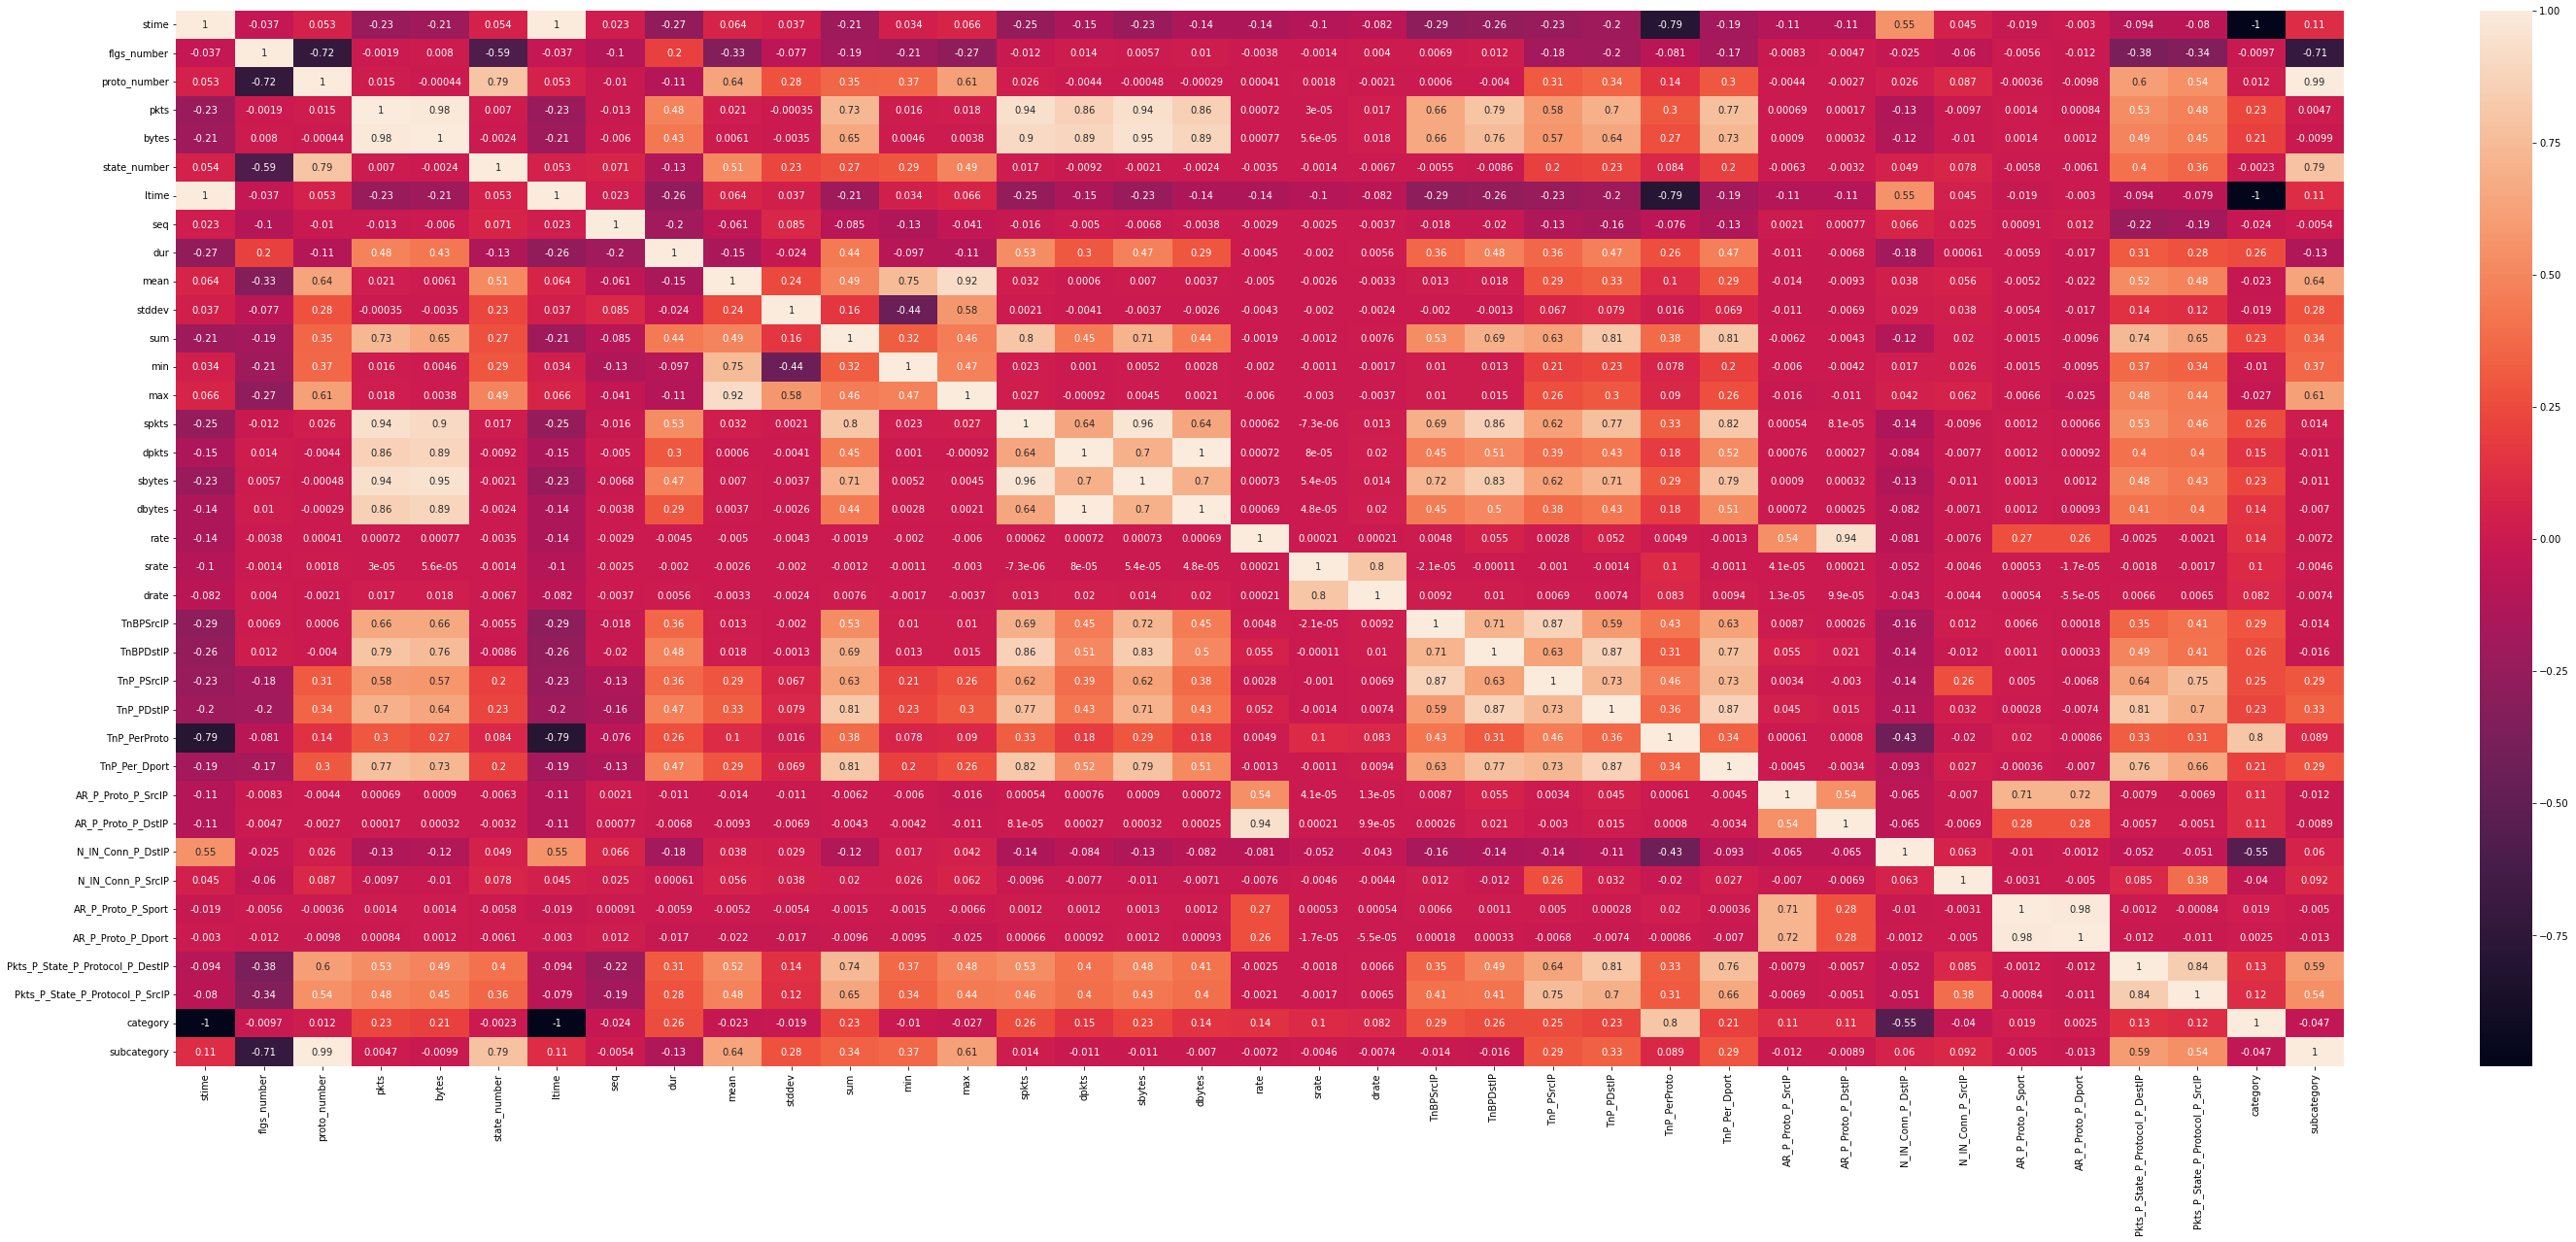

In [18]:
# plotting correlation matrix in graph
plt.figure(figsize = (50,20))
sns.heatmap(corr, annot = True)
plt.show()

In [22]:
# applying threshold limit and storing highly correlated col names in the set as set doesn't allow duplication
st = set()
for i in range (len(corr)):
    for j in range(i):
        if abs(corr.iloc[i][j]) > 0.5:
            st.add(corr.columns[i])

In [23]:
st

{'AR_P_Proto_P_Dport',
 'AR_P_Proto_P_DstIP',
 'AR_P_Proto_P_Sport',
 'AR_P_Proto_P_SrcIP',
 'N_IN_Conn_P_DstIP',
 'Pkts_P_State_P_Protocol_P_DestIP',
 'Pkts_P_State_P_Protocol_P_SrcIP',
 'TnBPDstIP',
 'TnBPSrcIP',
 'TnP_PDstIP',
 'TnP_PSrcIP',
 'TnP_PerProto',
 'TnP_Per_Dport',
 'bytes',
 'category',
 'dbytes',
 'dpkts',
 'drate',
 'ltime',
 'max',
 'mean',
 'min',
 'proto_number',
 'sbytes',
 'spkts',
 'state_number',
 'subcategory',
 'sum'}

In [24]:
len(st)

28

In [25]:
# creating new dataframe and removing highly correlated columns
df1 = df.drop(st,axis = 1)
df1

,stime,flgs_number,pkts,seq,dur,stddev,rate,srate,N_IN_Conn_P_SrcIP,attack
0,1.528103e+09,1.0,10.0,20.0,6.406424,0.544126,1.404840,0.780467,38.0,1.0
1,1.528103e+09,1.0,10.0,21.0,6.405851,0.544197,1.404966,0.780536,38.0,1.0
2,1.528103e+09,1.0,8.0,22.0,6.401038,1.110847,1.093573,0.624899,38.0,1.0
3,1.528103e+09,1.0,8.0,23.0,6.400703,1.113328,1.093630,0.624931,38.0,1.0
4,1.528103e+09,1.0,8.0,24.0,6.400472,1.113098,1.093669,0.624954,38.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1927096,1.526352e+09,1.0,2.0,3808.0,0.293476,0.000000,3.407434,0.000000,74.0,0.0
1927097,1.526352e+09,1.0,2.0,3809.0,0.292003,0.000000,3.424622,0.000000,74.0,0.0
1927098,1.526352e+09,1.0,2.0,3815.0,0.277896,0.000000,3.598469,0.000000,74.0,0.0
1927099,1.526352e+09,1.0,2.0,3816.0,0.280742,0.000000,3.561990,0.000000,74.0,0.0


# Applying Variance threshold limit

In [26]:
# Independent variable
X1 = df1.drop('attack',axis = 1)
X1[:5]

,stime,flgs_number,pkts,seq,dur,stddev,rate,srate,N_IN_Conn_P_SrcIP
0,1.528103e+09,1.0,10.0,20.0,6.406424,0.544126,1.404840,0.780467,38.0
1,1.528103e+09,1.0,10.0,21.0,6.405851,0.544197,1.404966,0.780536,38.0
2,1.528103e+09,1.0,8.0,22.0,6.401038,1.110847,1.093573,0.624899,38.0
3,1.528103e+09,1.0,8.0,23.0,6.400703,1.113328,1.093630,0.624931,38.0
4,1.528103e+09,1.0,8.0,24.0,6.400472,1.113098,1.093669,0.624954,38.0


In [27]:
# dependent variable
y1 = df1['attack']
y1[:5]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: attack, dtype: float64

In [28]:
var = VarianceThreshold(threshold = 600)
var.fit(X1)
var.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False])

In [29]:
useful_columns = X1.columns[var.get_support()]
useful_columns

Index(['stime', 'pkts', 'seq', 'rate', 'srate'], dtype='object')

In [32]:
notuseful_columns = X1.columns[var.get_support()== False]
notuseful_columns

Index(['flgs_number', 'dur', 'stddev', 'N_IN_Conn_P_SrcIP'], dtype='object')

In [33]:
X1 = X1.drop(notuseful_columns,axis =1)
X1

,stime,pkts,seq,rate,srate
0,1.528103e+09,10.0,20.0,1.404840,0.780467
1,1.528103e+09,10.0,21.0,1.404966,0.780536
2,1.528103e+09,8.0,22.0,1.093573,0.624899
3,1.528103e+09,8.0,23.0,1.093630,0.624931
4,1.528103e+09,8.0,24.0,1.093669,0.624954
...,...,...,...,...,...
1927096,1.526352e+09,2.0,3808.0,3.407434,0.000000
1927097,1.526352e+09,2.0,3809.0,3.424622,0.000000
1927098,1.526352e+09,2.0,3815.0,3.598469,0.000000
1927099,1.526352e+09,2.0,3816.0,3.561990,0.000000


# Use this data for modeling - Create 
Logistic regression, 
Random Forest, 
Decision Tree 
Note : Accuracy should be above 90%


# Modeling the data using Logisitic Regression

In [34]:
# creating arrays of independent and dependent variable
X1 = X1.values
y1 = y1.values

In [35]:
X1[:5]

array([[1.52810292e+09, 1.00000000e+01, 2.00000000e+01, 1.40484000e+00,
        7.80467000e-01],
       [1.52810292e+09, 1.00000000e+01, 2.10000000e+01, 1.40496600e+00,
        7.80536000e-01],
       [1.52810292e+09, 8.00000000e+00, 2.20000000e+01, 1.09357300e+00,
        6.24899000e-01],
       [1.52810292e+09, 8.00000000e+00, 2.30000000e+01, 1.09363000e+00,
        6.24931000e-01],
       [1.52810292e+09, 8.00000000e+00, 2.40000000e+01, 1.09366900e+00,
        6.24954000e-01]])

In [36]:
# applying standardscaler as data is in different range
X1 = preprocessing.StandardScaler().fit_transform(X1)
X1[:2]

array([[ 2.11491019e-01,  1.31036231e-02, -1.66969794e+00,
         4.16072170e-03, -1.31328500e-03],
       [ 2.11491041e-01,  1.31036231e-02, -1.66968439e+00,
         4.16177959e-03, -1.31320986e-03]])

In [37]:
# Training the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X1,y1, test_size = 0.25, random_state = 1000)
print("Train set : " , X_train.shape, Y_train.shape)
print("Test set: ", X_test.shape,  Y_test.shape)

Train set :  (1445325, 5) (1445325,)
Test set:  (481776, 5) (481776,)


# Modeling the data using Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 5000, solver = 'saga')
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_test)
print(f" Accuracy using Logistic Regression : {f1_score(Y_test,y_pred)*100}")

 Accuracy using Logistic Regression : 100.0


# Modeling the data using Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train,Y_train)
y_pred1 = classifier.predict(X_test)
print(f" Accuracy using Random Forest : {f1_score(Y_test,y_pred1)*100}")

 Accuracy using Random Forest : 100.0


# Modeling the data using Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train,Y_train)
y_pred2 = clf.predict(X_test)
print(f" Accuracy using Decision Tree : {f1_score(Y_test,y_pred2)*100}")

 Accuracy using Decision Tree : 100.0
